# Scraping MLB Stats with Beautiful Soup

Here we are going to dive into Option 2: Data wrangling/visualization/analysis...

We're going to pick this data and then develop our data oriented problem as we go. Since this data is interesting to me, I'm sure we can think of something

## Preliminaries

In [142]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import commonly used libraries and magic command for inline plotting

In [143]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [144]:
%matplotlib inline

## Part 0 - Get Some Data

So I want to get the batting stats of my favorite team, the Los Angeles Angels

- So the way that baseball-reference works is all of the pages have the same name except for the team name, which is nice so if you want to get a different teams stats, the only part of the code that you need to change is the team name

In [145]:
# store the team name we want to work with in myTeam
myTeam = 'LAA'

# start with storing the url of the website that we are going to get the data from
url = r'https://www.baseball-reference.com/teams/' + myTeam + r'/2023-batting.shtml#all_team_batting'


In [146]:
# create list of the stats that we care about
standardBattingStats = [
    'player',
    'pos',
    'G',
    'PA',
    'AB',
    'R',
    'H',
    '2B',
    '3B',
    'HR',
    'RBI',
    'SB',
    'CS',
    'BB',
    'SO',
    'batting_avg',
    'onbase_perc',
    'slugging_perc',
    'onbase_plus_slugging',
    'onbase_plus_slugging_plus',
    'TB',
    'GIDP',
    'HBP',
    'SH',
    'SF',
    'IBB'
]

In [147]:
# Create object page
page = requests.get(url)

# parser-lxml = Change html to Python friendly format
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')

In [148]:
# grab each teams current year batting stats and turn it into a dataframe
tableTeamBatting = soup.find('table', id='team_batting')

In [149]:
# grab player UID
puidList = []
rows = tableTeamBatting.select('tr')
for row in rows:
    playerUID = row.select_one('td[data-append-csv]')
    playerUID = playerUID.get('data-append-csv')if playerUID else None
    if playerUID == None:
        continue
    else:
        puidList.append(playerUID)

In [150]:
# grab players position
compList = []
for row in rows:
    thingList = []
    for stat in range(len(standardBattingStats)):
        thing = row.find("td", attrs={"data-stat" : standardBattingStats[stat]})
        if thing == None:
            continue
        elif row.find("td", attrs={"data-stat" : 'player'}).text == 'Team Totals':
            continue
        elif row.find("td", attrs={"data-stat" : 'player'}).text == 'Rank in 15 NL teams':
            continue
        elif row.find("td", attrs={"data-stat" : 'player'}).text == 'Rank in 15 AL teams':
            continue
        elif row.find("td", attrs={"data-stat" : 'player'}).text == 'Non-Pitcher Totals':
            continue
        elif row.find("td", attrs={"data-stat" : 'player'}).text == 'Pitcher Totals':
            continue
        elif thing.text == '':
            continue
        elif thing.text == 'NaN':
            continue
        else:
            thingList.append(thing.text)
    compList.append(thingList)

In [151]:
# insert the batting headers to a dataframe
teamBattingDF = pd.DataFrame(data=compList, columns=standardBattingStats)

# make all NaNs blanks for aesthic reasons
teamBattingDF = teamBattingDF.dropna(how='all').fillna('')

# insert the pUIDs into the dataframe for later
teamBattingDF.insert(loc=0, column='pUID', value=puidList)

# insert the team acronym for each player
teamBattingDF.insert(loc=2, column='Team', value=myTeam)

In [152]:
# show the output
teamBattingDF.head()

,pUID,player,Team,pos,G,PA,AB,R,H,2B,...,onbase_perc,slugging_perc,onbase_plus_slugging,onbase_plus_slugging_plus,TB,GIDP,HBP,SH,SF,IBB
1,thaisma01,Matt Thaiss*,LAA,C,54,167,141,22,39,6,...,.383,.404,.787,118,57,2,2,0,1,1
2,walshja01,Jared Walsh* (40-man),LAA,1B,28,78,67,5,8,4,...,.244,.224,.467,31,15,1,0,0,0,0
3,drurybr01,Brandon Drury,LAA,2B,72,294,271,34,74,17,...,.316,.494,.811,119,134,9,5,0,4,0
4,netoza01,Zach Neto (10-day IL),LAA,SS,55,199,174,24,45,12,...,.338,.431,.769,111,75,4,11,1,2,0
5,rendoan01,Anthony Rendon (10-day IL),LAA,3B,38,164,133,22,33,6,...,.366,.316,.682,91,42,4,6,0,4,0


Now I want to get the pitching stats from LAA as well... So we will go about it in a similar way

In [153]:
# create a url object
url = r'https://www.baseball-reference.com/teams/' + myTeam + r'/2023-pitching.shtml#all_team_pitching'

In [154]:
# list of standard pitching stats
standardPitchingStats = [
    'player',
    'W',
    'L',
    'win_loss_perc',
    'earned_run_avg',
    'G',
    'GS',
    'GF',
    'CG',
    'SHO',
    'SV',
    'IP',
    'H',
    'R',
    'ER',
    'HR',
    'BB',
    'IBB',
    'SO',
    'HBP',
    'BK',
    'WP',
    'batters_faced',
    'earned_run_avg_plus',
    'fip',
    'whip',
    'hits_per_nine',
    'home_runs_per_nine',
    'bases_on_balls_per_nine',
    'strikeouts_per_nine',
    'strikeouts_per_base_on_balls'
]

In [155]:
# Create object page
page = requests.get(url)

# parser-lxml = Change html to Python friendly format
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')

In [156]:
# grab each teams current year batting stats and turn it into a dataframe
tableTeamPitching = soup.find('table', id='team_pitching')

In [157]:
# grab player UID
puidList = []
rows = tableTeamPitching.select('tr')
for row in rows:
    playerUID = row.select_one('td[data-append-csv]')
    playerUID = playerUID.get('data-append-csv')if playerUID else None
    if playerUID == None:
        continue
    else:
        puidList.append(playerUID)

In [158]:
# grab players position
compList = []
for row in rows:
    thingList = []
    for stat in range(len(standardPitchingStats)):
        thing = row.find("td", attrs={"data-stat" : standardPitchingStats[stat]})
        if thing == None:
            continue
        elif row.find("td", attrs={"data-stat" : 'player'}).text == 'Team Totals':
            continue
        elif row.find("td", attrs={"data-stat" : 'player'}).text == 'Rank in 15 NL teams':
            continue
        elif row.find("td", attrs={"data-stat" : 'player'}).text == 'Rank in 15 AL teams':
            continue
        elif row.find("td", attrs={"data-stat" : 'player'}).text == 'Non-Pitcher Totals':
            continue
        elif row.find("td", attrs={"data-stat" : 'player'}).text == 'Pitcher Totals':
            continue
        elif thing.text == '':
            continue
        elif thing.text == 'NaN':
            continue
        else:
            thingList.append(thing.text)
    compList.append(thingList)

In [159]:
# insert the batting headers to a dataframe
teamPitchingDF = pd.DataFrame(data=compList, columns=standardPitchingStats)

# make all NaNs blanks for aesthic reasons
teamPitchingDF = teamPitchingDF.dropna(how='all').fillna('')

# insert the pUIDs into the dataframe for later
teamPitchingDF.insert(loc=0, column='pUID', value=puidList)

# insert the team acronym for each player
teamPitchingDF.insert(loc=2, column='Team', value=myTeam)

In [160]:
# show output
teamPitchingDF.head()

,pUID,player,Team,W,L,win_loss_perc,earned_run_avg,G,GS,GF,...,WP,batters_faced,earned_run_avg_plus,fip,whip,hits_per_nine,home_runs_per_nine,bases_on_balls_per_nine,strikeouts_per_nine,strikeouts_per_base_on_balls
1,ohtansh01,Shohei Ohtani,LAA,6,3,.667,3.13,15,15,0,...,11,359,138,3.94,1.045,5.7,1.2,3.7,11.8,3.16
2,detmere01,Reid Detmers*,LAA,1,5,.167,3.77,14,14,0,...,4,323,115,3.25,1.284,8.1,0.8,3.4,11.1,3.24
3,sandopa02,Patrick Sandoval*,LAA,4,6,.400,4.16,14,14,0,...,3,338,104,4.10,1.467,9.6,0.7,3.6,6.8,1.90
4,anderty01,Tyler Anderson*,LAA,4,2,.667,5.54,14,14,0,...,3,335,78,4.67,1.540,9.9,1.1,4.0,7.2,1.82
5,cannigr01,Griffin Canning,LAA,6,2,.750,3.99,12,12,0,...,3,271,108,4.52,1.163,8.1,1.5,2.3,8.5,3.65


## Part 1 - Using Plotly

Import both Plot Express and the Graph Objects libraries...

In [161]:
import plotly.express as px
import plotly.graph_objects as go

Let's try something simple...

I want to plot the LAA Batters on the X axis and their batting averages on the Y axis...

In [162]:
fig = px.scatter(
    teamBattingDF, 
    x="player", 
    y="batting_avg", 
    title="Plotly Express Batting Averages"
)
fig.show()

So that was making a simple scatter plot, it didn't really turn out exactly how I expected it to, it seems like it put a batting average of .000 as the highest value which is kind of weird...

But now lets try to do a histogram to show strikeouts...

In [163]:
fig2 = px.histogram(teamPitchingDF, x="SO")

fig2.show()

It seems like plotly doesn't know how to handle 0.0 since it keeps putting it in random spots

Lets try the interactive one...

## Part 2 - ipywidgets

In [164]:
import ipywidgets as widgets

data_cols = teamBattingDF.columns.tolist()
data_cols

['pUID',
 'player',
 'Team',
 'pos',
 'G',
 'PA',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'batting_avg',
 'onbase_perc',
 'slugging_perc',
 'onbase_plus_slugging',
 'onbase_plus_slugging_plus',
 'TB',
 'GIDP',
 'HBP',
 'SH',
 'SF',
 'IBB']

In [165]:
pick_col_x = widgets.Dropdown(
    options=data_cols,
    description="X Variable"
)

In [166]:
pick_col_y = widgets.Dropdown(
    options=data_cols,
    description="Y Variable"
)

Now we need to create the wrapper function that takes a data column and creates something, like a scatter plot

In [167]:
def create_scatter(col_1, col_2):
    fig = px.scatter(teamBattingDF, x=col_1, y=col_2)
    fig.show()


widgets.interact(create_scatter, col_1=pick_col_x, col_2=pick_col_y)

interactive(children=(Dropdown(description='X Variable', options=('pUID', 'player', 'Team', 'pos', 'G', 'PA', …

<function __main__.create_scatter(col_1, col_2)>

That's pretty cool, it's not perfect but it's certainly interactive

## Part 3 - Lets try Bokeh

In [168]:
# Lets try something simple
from bokeh.plotting import figure, output_file, show

In [169]:
# instantiate the figure object
fig3 = figure(title="Bokeh Batters Hits")

fig3.line(x=teamBattingDF["pUID"].tolist(), y=teamBattingDF["H"].tolist())

show(fig3)

So I didn't realize this beforehand, but bokeh creates the graph in a webpage outside of this notebook, which I don't really like. Plotly is much more convenient since it stays in the notebook.

In [170]:
# lets make a quick bar chart of homeruns
bar_chart = figure(title="Bokeh Bar Chart")

height = 0.5

bar_chart.hbar(teamBattingDF["pUID"].tolist(), right=teamBattingDF["HR"].tolist(), height=height)

show(bar_chart)

I really don't like bokeh as much, and the actual programming feels about the same as plotly. So for working with notebooks, its definitely worse.

## Part 4 - Plotly vs ipywidgets vs Bokeh

ipywidgets was really cool with the interactivity of being able to choose axes, but I think plotly was the best to use. Bokeh really did not impress me.

## Part 5 - Seaborn

I decided not to include this in the previous parts because I've used Seaborn a little before and I believe from what I've seen that it blows the competition away.

It's very good in conjunction with matplotlib and can do some very straightforward statistical analysis like regression modeling and more... I also think that customizing the plot in seaborn is a lot easier

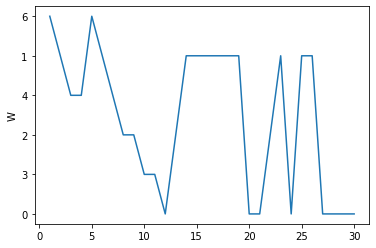

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# get data
data = teamPitchingDF

# draw lineplot
sns.lineplot(data=data, x=data.index.tolist(), y="W")

# show data
plt.show()

Its just a plot of each players wins so far this season on the mound... so nothing too crazy but I think seaborn is really easy to use

Lets do some subplotting...

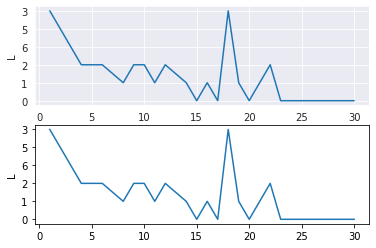

In [172]:
# draw lineplot
def plot():
    sns.lineplot(data=data, x=data.index.tolist(), y="L")

with sns.axes_style('darkgrid'):
    plt.subplot(211)
    plot()

plt.subplot(212)
plot()

Their the same plot, plotting the losses that each pitcher has by index... however, the top plot uses a darker grid

You can also print out the color palettes in seaborn to see which ones are good to color your charts... Like I enjoy the color green so...

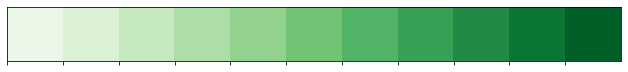

In [173]:
# current colot palette
palette = sns.color_palette('Greens', 11)
  
# sequential color palette
sns.palplot(palette)
  
plt.show()

Here are all the different green hues you can use.

Even scatter plots are super easy with seaborn...

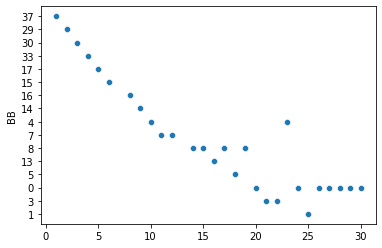

In [174]:
# draw scatter
sns.scatterplot(data=data, x=data.index.tolist(), y="BB")

# show data
plt.show()

The plot above is showing the number of walks each pitcher has committed so far this season